In [25]:
from IPython.display import Image

## Spanish Dependency Parser 

Please see https://stanfordnlp.github.io/stanza/installation_usage.html#installation for installation of Stanford CoreNLP. 

``` 
>>> !pip install stanza

```

Then, do the following.

In [2]:
import stanza

stanza.download('es') # download Spanish model
nlp = stanza.Pipeline('es') # initialize Spanish neural pipeline
doc = nlp("Has vendido un nuevo producto que es muy popular dentro de tu escuela.")

2021-06-03 21:26:51 INFO: Downloading default packages for language: es (Spanish)...
2021-06-03 21:26:53 INFO: File exists: /Users/eun-youngchristinapark/stanza_resources/es/default.zip.
2021-06-03 21:26:57 INFO: Finished downloading models and saved to /Users/eun-youngchristinapark/stanza_resources.
2021-06-03 21:26:57 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |
| depparse  | ancora  |
| ner       | conll02 |

2021-06-03 21:26:57 INFO: Use device: cpu
2021-06-03 21:26:57 INFO: Loading: tokenize
2021-06-03 21:26:57 INFO: Loading: mwt
2021-06-03 21:26:57 INFO: Loading: pos
2021-06-03 21:26:57 INFO: Loading: lemma
2021-06-03 21:26:57 INFO: Loading: depparse
2021-06-03 21:26:58 INFO: Loading: ner
2021-06-03 21:26:59 INFO: Done loading processors!


Next, install CoreNLP client and Spanish model.

In [10]:
stanza.install_corenlp(dir="/Users/eun-youngchristinapark/Documents/stanza_corenlp")

2021-05-28 16:01:28 WARNING: Directory /Users/eun-youngchristinapark/Documents/stanza_corenlp already exists. Please install CoreNLP to a new directory.


In [11]:
stanza.download_corenlp_models(model='spanish', version='4.1.0', dir="/Users/eun-youngchristinapark/Documents/stanza_corenlp")

2021-05-28 16:01:31 INFO: Downloading spanish models (version 4.1.0) into directory /Users/eun-youngchristinapark/Documents/stanza_corenlp...


In [31]:
from stanza.server import CoreNLPClient

### Spanish Dependency Parser

We will start a client and take a look at the port to ensure that the client is running.

We have to remember to start and stop the client; otherwise, the port will be occupied by the client and will cause a problem when we try to run the client next time. 

In [38]:
client = CoreNLPClient(
        properties = 'es',
        classpath = '/Users/eun-youngchristinapark/Documents/stanza_corenlp/*',
        annotators=['depparse'],
        timeout=30000,
        memory='5G')

2021-06-04 15:19:20 INFO: Using CoreNLP default properties for: spanish.  Make sure to have spanish models jar (available for download here: https://stanfordnlp.github.io/CoreNLP/) in CLASSPATH


In [39]:
client.start()

2021-06-04 15:19:22 INFO: Starting server with command: java -Xmx5G -cp /Users/eun-youngchristinapark/Documents/stanza_corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 30000 -threads 5 -maxCharLength 100000 -quiet False -serverProperties spanish -annotators depparse -preload -outputFormat serialized


Now take a look at the port 9000 in a web browser. You should see something like this: 

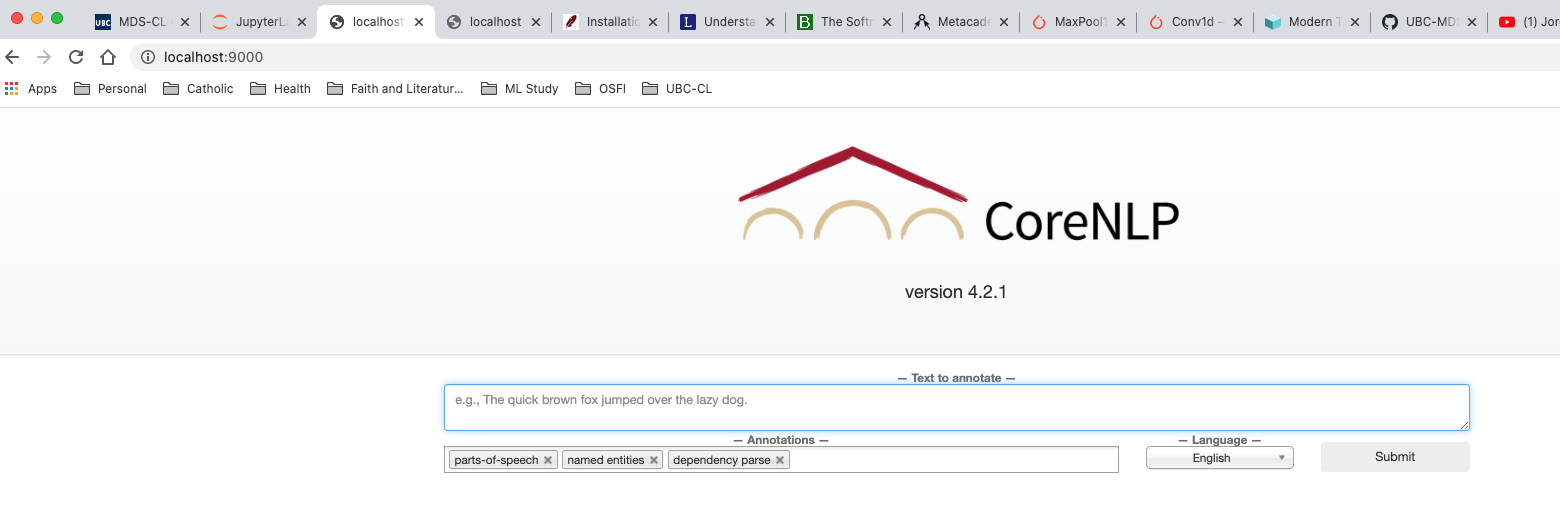

In [27]:
Image(filename = 'port9000.png')

Now stop the client by typing ```client.stop()```
If all this worked, we are ready to use CoreNLPClient for our analysis. 

Now let's take a look at the annotations.

In [40]:
client.stop()

In [41]:
text = 'la niña pequeña y encantadora'
with CoreNLPClient(
        properties = 'es',
        classpath = '/Users/eun-youngchristinapark/Documents/stanza_corenlp/*',
        annotators=['depparse'],
        timeout=30000,
        memory='5G') as client:
    ann = client.annotate(text)

2021-06-04 15:19:34 INFO: Using CoreNLP default properties for: spanish.  Make sure to have spanish models jar (available for download here: https://stanfordnlp.github.io/CoreNLP/) in CLASSPATH
2021-06-04 15:19:34 INFO: Starting server with command: java -Xmx5G -cp /Users/eun-youngchristinapark/Documents/stanza_corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 30000 -threads 5 -maxCharLength 100000 -quiet False -serverProperties spanish -annotators depparse -preload -outputFormat serialized


Access the first sentence and its edges from dependency parsing. 

In [42]:
sentence = ann.sentence[0]

In [43]:
sentence.basicDependencies.edge

[source: 2
target: 1
dep: "det"
isExtra: false
sourceCopy: 0
targetCopy: 0
language: Spanish
, source: 2
target: 3
dep: "amod"
isExtra: false
sourceCopy: 0
targetCopy: 0
language: Spanish
, source: 3
target: 5
dep: "conj"
isExtra: false
sourceCopy: 0
targetCopy: 0
language: Spanish
, source: 5
target: 4
dep: "cc"
isExtra: false
sourceCopy: 0
targetCopy: 0
language: Spanish
]